In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("../saved/final_dataset_cs_papers_last_20.csv")

In [2]:
df_cs = df.loc[df["FieldOfStudy_0"] == "computer science"]
df_cs.drop(labels=[
'Author_1',
'Author_10',
'Author_11',
'Author_2',
'Author_3',
'Author_4',
'Author_5',
'Author_6',
'Author_7',
'Author_8',
'Author_9',
'FieldOfStudy_0',
'FieldOfStudy_1',
'FieldOfStudy_2',
'FieldOfStudy_3',
'FieldOfStudy_4',
'FieldOfStudy_5',
'FirstPage',
'LastPage',
'PublishedDate'
], inplace=True, axis=1)
df_cs.columns.tolist()

['PaperId',
 'Abstract',
 'CitationCount',
 'CitationCountPerYear',
 'JournalName',
 'Publisher',
 'Rank',
 'Title',
 'YearsSincePublication',
 'AuthorProminence',
 'MagBin',
 'CitationBin',
 'AuthorRank',
 'JournalNameRank',
 'PublisherRank',
 'PageCount',
 'Processed_Abstract',
 'JournalNameRankNormalized',
 'PublisherRankNormalized']

<AxesSubplot:>

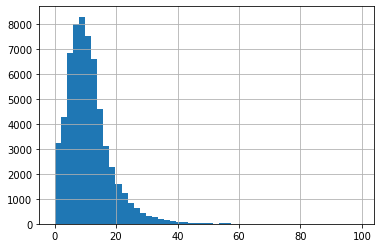

In [3]:
df_cs["PageCount"].hist(bins=50)

In [4]:
df_cs["PageCount"].max()

99.0

<AxesSubplot:>

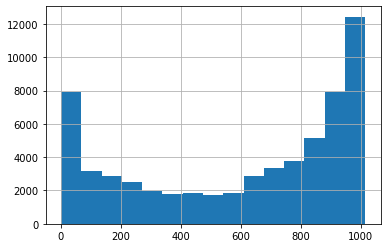

In [5]:
df_cs["JournalNameRank"].hist(bins=15)

<AxesSubplot:>

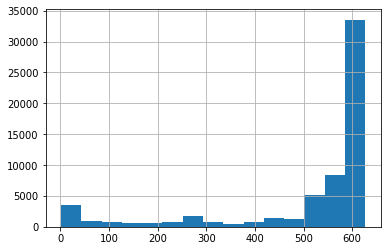

In [6]:
df_cs["PublisherRank"].hist(bins=15)

In [7]:
by_journal = df_cs.groupby(["JournalName"]).sum().sort_values(["CitationCount"], ascending=False)

In [8]:
by_journal.head()

,PaperId,CitationCount,CitationCountPerYear,Rank,YearsSincePublication,AuthorProminence,AuthorRank,JournalNameRank,PublisherRank,PageCount,JournalNameRankNormalized,PublisherRankNormalized
JournalName,,,,,,,,,,,,
Bioinformatics,1903773256051,124531,9948.775271,17874424,9615.345205,363,223120.0,893200.0,545498.0,3808.0,1199440.0,506487.0
IEEE Transactions on Pattern Analysis and Machine Intelligence,437599025624,50891,4494.111604,3892600,2130.879452,162,282798.0,204828.0,126017.0,2281.0,284012.0,110907.0
Expert Systems With Applications,1591040399157,35199,3534.149058,15751395,7079.994521,291,104024.0,765466.0,459831.0,7227.0,841399.0,336030.0
IEEE Journal on Selected Areas in Communications,666790464138,30219,2455.026221,6143838,3775.010959,254,323371.0,314110.0,193987.0,3355.0,408032.0,149718.0
IEEE Transactions on Information Theory,368216000069,30092,2213.845127,3443921,1866.830137,136,193821.0,175566.0,107430.0,2485.0,240120.0,83808.0


In [9]:
occurrances = []
for name in by_journal.index:
    occurrances.append(df_cs[df_cs["JournalName"] == name].shape[0])
    
by_journal["NumberPapers"] = occurrances

In [10]:
cc = df_cs["CitationCountPerYear"].values
cc.shape

(61019,)

In [11]:
print(f"Max number of citations: {np.max(cc)}")
print(f"Median number of citations: {np.median(cc)}")
print(f"Mean number of citations: {np.mean(cc)}")
print(f"Std number of citations: {np.std(cc)}")

print(f"Number of papers with 0 citations: {np.sum((cc == 0))}")
print(f"Number papers with over 50 citations: {np.sum(cc > 50)}")
print(f"Number papers with over 100 citations: {np.sum(cc > 100)}")
print(f"Number papers with over 1k citations: {np.sum(cc > 1000)}")
print(f"Number papers with over 10k citations: {np.sum(cc > 10000)}")


Max number of citations: 1143.3305548940225
Median number of citations: 0.6211003970504821
Mean number of citations: 2.8393615494580478
Std number of citations: 12.939019144245327
Number of papers with 0 citations: 10686
Number papers with over 50 citations: 335
Number papers with over 100 citations: 123
Number papers with over 1k citations: 1
Number papers with over 10k citations: 0


/Users/janhenrikbernhard/opt/anaconda3/envs/aml/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

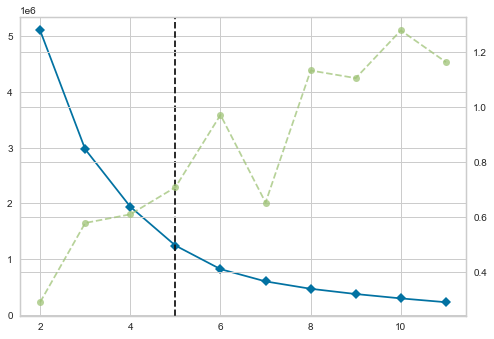

In [12]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(cc.reshape(-1, 1))

In [13]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=5, random_state=0)
gmm.fit(cc.reshape(-1,1))
gmm.means_

array([[ 0.14999922],
       [93.09541725],
       [ 4.85803337],
       [ 1.06402323],
       [16.25123553]])

In [16]:
gmm.covariances_

array([[[2.59045965e-02]],

       [[1.05821505e+04]],

       [[7.02078340e+00]],

       [[3.69817546e-01]],

       [[7.24333979e+01]]])

In [17]:
print(df_cs.shape)
df_cs.head(2)

(61019, 19)


,PaperId,Abstract,CitationCount,CitationCountPerYear,JournalName,Publisher,Rank,Title,YearsSincePublication,AuthorProminence,MagBin,CitationBin,AuthorRank,JournalNameRank,PublisherRank,PageCount,Processed_Abstract,JournalNameRankNormalized,PublisherRankNormalized
0,2013266033,Two important automation characteristics are c...,2,0.352827,International Journal of Human-computer Studie...,"Academic Press, Inc.",22262,Crossing the boundaries of automation-Function...,5.668493,0,above-average,below-average,1.0,980.0,596.0,9.0,important automation characteristic crucial co...,1319.0,479.0
1,2147483915,Many Internet of Things (IoT) technologies h...,26,5.200000,IEEE Internet of Things Journal,IEEE,18697,EasyConnect: A Management System for IoT Devic...,5.000000,1,low,high,1372.0,502.0,627.0,10.0,many internet things iot technology use applic...,1243.0,478.0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation(df, columns=None, plot=True):
    t = df.loc[:, columns] if columns else df
    if not plot:
        print(t.corr())
    else:
        fig = plt.figure()
        mask = np.triu(t.corr())
        sns.heatmap(
            t.corr(),
            mask=mask,
            cbar=False,
            square=True,
            annot=True,
            vmin=-1,
            vmax=1,
            center=0,
            cmap="coolwarm_r",
            linecolor="black",
        )
        plt.show()

In [19]:
def custom_binning(x, thresholds=None):
    for i, threshold in enumerate(thresholds):
        if x <= threshold:
            return i

In [20]:
threshold = [mu + np.sqrt(var).round() for mu, var in zip(gmm.means_, gmm.covariances_)]
threshold.sort()
print(threshold)
df_cs["BinnedCitationsPerYear"] = pd.Series([custom_binning(x, thresholds=threshold) for x in cc], index=df_cs.index)

[array([[0.14999922]]), array([[2.06402323]]), array([[7.85803337]]), array([[25.25123553]]), array([[196.09541725]])]


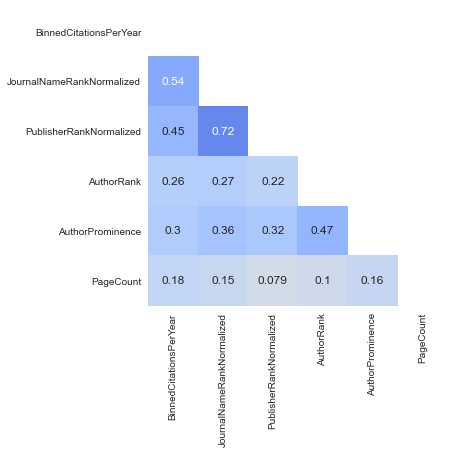

In [22]:
correlation(df_cs, columns=[
    "BinnedCitationsPerYear",
    "JournalNameRankNormalized",
    "PublisherRankNormalized",
    "AuthorRank",
    "AuthorProminence",
    "PageCount"
])

[ 0.  1.  2.  3.  4. nan]
[15095, 31964, 9139, 3905, 876]


([<matplotlib.axis.XTick at 0x7faba7d5ac90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

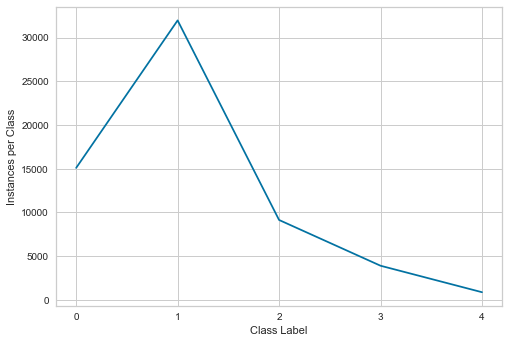

In [23]:
classes = df_cs["BinnedCitationsPerYear"].unique()
classes.sort()
print(classes)
classes = classes[:-1]
x = [np.sum(df_cs.loc[:, "BinnedCitationsPerYear"].values == c) for c in classes]
print(x)
fig = plt.figure()
plt.plot(classes, x)
plt.ylabel("Instances per Class")
plt.xlabel("Class Label")
plt.xticks(classes)

In [24]:
df_uniform = df_cs.copy()
# df_uniform.drop(df_uniform[df_uniform["BinnedCitationsPerYear"]==1].index, inplace=True)
df_uniform.drop(df_uniform[np.isnan(df_uniform["BinnedCitationsPerYear"])].index, inplace=True)
print(df_uniform.shape)
print(df_uniform["BinnedCitationsPerYear"].unique())

(60979, 20)
[1. 2. 0. 3. 4.]


In [25]:
df_uniform.loc[df_uniform["BinnedCitationsPerYear"]==1, "BinnedCitationsPerYear"] = 0
df_uniform.loc[df_uniform["BinnedCitationsPerYear"]==2, "BinnedCitationsPerYear"] = 1
df_uniform.loc[df_uniform["BinnedCitationsPerYear"]==3, "BinnedCitationsPerYear"] = 1
df_uniform.loc[df_uniform["BinnedCitationsPerYear"]==4, "BinnedCitationsPerYear"] = 1

In [26]:
df_uniform.head()

,PaperId,Abstract,CitationCount,CitationCountPerYear,JournalName,Publisher,Rank,Title,YearsSincePublication,AuthorProminence,MagBin,CitationBin,AuthorRank,JournalNameRank,PublisherRank,PageCount,Processed_Abstract,JournalNameRankNormalized,PublisherRankNormalized,BinnedCitationsPerYear
0,2013266033,Two important automation characteristics are c...,2,0.352827,International Journal of Human-computer Studie...,"Academic Press, Inc.",22262,Crossing the boundaries of automation-Function...,5.668493,0,above-average,below-average,1.0,980.0,596.0,9.0,important automation characteristic crucial co...,1319.0,479.0,0.0
1,2147483915,Many Internet of Things (IoT) technologies h...,26,5.200000,IEEE Internet of Things Journal,IEEE,18697,EasyConnect: A Management System for IoT Devic...,5.000000,1,low,high,1372.0,502.0,627.0,10.0,many internet things iot technology use applic...,1243.0,478.0,1.0
2,2147483970,This paper deals with an application of wavele...,7,0.369166,Lecture Notes in Computer Science,"Springer, Berlin, Heidelberg",20917,On the Performance of Informative Wavelets for...,18.961644,1,below-average,above-average,128.0,993.0,624.0,14.0,this paper deal application wavelet feature ex...,888.0,363.0,0.0
3,2013266260,An object-to-object color mapping method based...,3,0.150578,Journal of Electronic Imaging,International Society for Optics and Photonics,22083,Object-to-object color mapping by image segmen...,19.923288,1,above-average,below-average,127.0,759.0,585.0,10.0,an object object color map method base image s...,624.0,303.0,0.0
4,2013266632,"We present a distributed, integrated medium ac...",13,2.476514,IEEE Transactions on Parallel and Distributed ...,IEEE,20198,Throughput-Optimal Cross-Layer Design for Cogn...,5.249315,1,low,high,1112.0,995.0,627.0,10.0,we present distribute integrate medium access ...,1183.0,478.0,1.0


[47059, 13920] [0. 1.] 1


([<matplotlib.axis.XTick at 0x7faba7d49cd0>,
 [Text(0, 0, ''), Text(0, 0, '')])

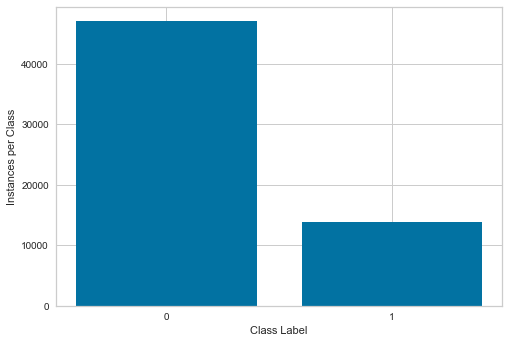

In [27]:
classes = df_uniform["BinnedCitationsPerYear"].unique()
classes.sort()
x = [np.sum(df_uniform.loc[:, "BinnedCitationsPerYear"].values == c) for c in classes]
split_idx = np.argmin(x)
print(x, classes, split_idx)
fig = plt.figure()
plt.bar(classes, x)
plt.ylabel("Instances per Class")
plt.xlabel("Class Label")
plt.xticks(classes)

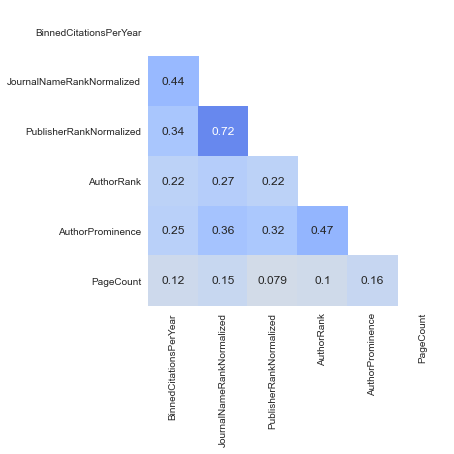

In [29]:
correlation(df_uniform, columns=[
    "BinnedCitationsPerYear",
    "JournalNameRankNormalized",
    "PublisherRankNormalized",
    "AuthorRank",
    "AuthorProminence",
    "PageCount"
])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
features = [
    "PaperId",
    "JournalNameRankNormalized",
    "PublisherRankNormalized",
    "AuthorRank",
    "AuthorProminence",
    "PageCount"
    ]
X = df_uniform.loc[:, features].values
y = df_uniform.loc[:, "BinnedCitationsPerYear"].values
print(X.shape, y.shape)

X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=0)
X_train, X_dev, y_train, y_dev = train_test_split(X_, y_, test_size=0.15, shuffle=True, random_state=0)

X_train_mini, y_train_mini = X_train[:1000], y[:1000]

(60979, 6) (60979,)


In [31]:
def make_uniform(labels, max_cnt):
    selection= np.zeros_like(labels, dtype=bool)
    labels = labels.astype(int)
    for c in range(np.min(labels), np.max(labels) + 1):
        cnt = 0
        for i, y in enumerate(labels):
            if cnt == max_cnt: break
            bool_val = y == c
            if bool_val:
                cnt += int(bool_val)
                selection[i] = bool_val
    return selection

In [32]:
from sklearn.metrics import classification_report
split = np.sum(y_train==split_idx)
selection = make_uniform(y_train, split)
y_train_uniform = y_train[selection]
X_train_uniform = X_train[selection]
print(classification_report(y_train_uniform, y_train_uniform))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10701
         1.0       1.00      1.00      1.00     10701

    accuracy                           1.00     21402
   macro avg       1.00      1.00      1.00     21402
weighted avg       1.00      1.00      1.00     21402



In [33]:
split = np.sum(y_dev==split_idx)
selection = make_uniform(y_dev, split)
y_dev_uniform = y_dev[selection]
X_dev_uniform = X_dev[selection]
print(X_dev_uniform.shape)
print(classification_report(y_dev_uniform, y_dev_uniform))

(3764, 6)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1882
         1.0       1.00      1.00      1.00      1882

    accuracy                           1.00      3764
   macro avg       1.00      1.00      1.00      3764
weighted avg       1.00      1.00      1.00      3764



In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

nn = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('nn', MLPClassifier(
        hidden_layer_sizes=(8, 16, 32, 16, 8),
        max_iter=500,
#         early_stopping=True,
        learning_rate="adaptive"
    
    ))
])
nn.fit(X_train_uniform[:, 1:], y_train_uniform)
print(nn.score(X_train_uniform[:, 1:], y_train_uniform))
print(nn.score(X_dev_uniform[:, 1:], y_dev_uniform))


0.7446967573124007
0.7345908607863975


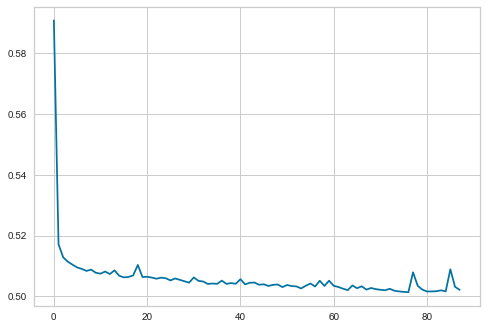

In [49]:
plt.plot(nn['nn'].loss_curve_)

In [36]:
from sklearn.metrics import confusion_matrix
y_true = y_test
X_true = X_test
y_pred = nn.predict(X_true[:, 1:])
print(nn.score(X_true[:, 1:], y_true))
print(confusion_matrix(y_true, y_pred, labels=[0,1]))
print(classification_report(y_true, y_pred))

0.6862905870777304
[[3102 1659]
 [ 254 1083]]
              precision    recall  f1-score   support

         0.0       0.92      0.65      0.76      4761
         1.0       0.39      0.81      0.53      1337

    accuracy                           0.69      6098
   macro avg       0.66      0.73      0.65      6098
weighted avg       0.81      0.69      0.71      6098



In [45]:
from sklearn.naive_bayes import GaussianNB

nb_model = Pipeline(steps=[("StandardScaler", StandardScaler()), ("nb", GaussianNB())])
nb_model.fit(X_train[:, 1:], y_train)

print(nb_model.score(X_train[:, 1:], y_train))
print(nb_model.score(X_dev[:, 1:], y_dev))

0.7723375064311438
0.7690999635612777


In [46]:
from sklearn.svm import SVC

svc = Pipeline(steps=[("StandardScaler", StandardScaler()), ("svc", SVC(kernel="linear", probability=True))])
svc.fit(X_train_uniform[:, 1:], y_train_uniform)

print(svc.score(X_train_uniform[:, 1:], y_train_uniform))
print(svc.score(X_dev_uniform[:, 1:], y_dev_uniform))

0.7368002990374731
0.7335281615302869


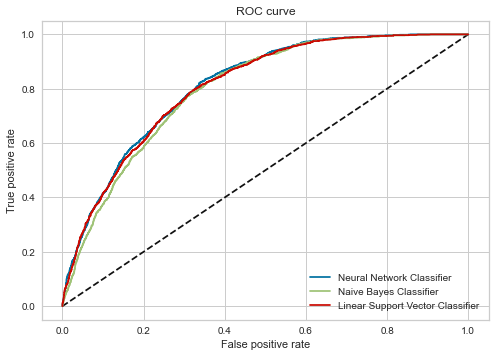

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred = nn.predict_proba(X_test[:, 1:])
tpr_grd_nn, fpr_grd_nn, _ = roc_curve(y_test, y_pred[:,1])

y_pred = nb_model.predict_proba(X_test[:, 1:])
tpr_grd_nb, fpr_grd_nb, _ = roc_curve(y_test, y_pred[:,1])

y_pred = svc.predict_proba(X_test[:, 1:])
tpr_grd_lr, fpr_grd_lr, _ = roc_curve(y_test, y_pred[:,1])

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(tpr_grd_nn, fpr_grd_nn, label='Neural Network Classifier')
plt.plot(tpr_grd_nb, fpr_grd_nb, label='Naive Bayes Classifier')
plt.plot(tpr_grd_lr, fpr_grd_lr, label='Linear Support Vector Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [39]:
y_true = y_test
X_true = X_test
y_pred = nb_model.predict(X_true[:, 1:])
print(nb_model.score(X_true[:, 1:], y_true))
print(confusion_matrix(y_true, y_pred, labels=[0,1]))
print(classification_report(y_true, y_pred))

0.7727123647097409
[[4050  711]
 [ 675  662]]
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      4761
         1.0       0.48      0.50      0.49      1337

    accuracy                           0.77      6098
   macro avg       0.67      0.67      0.67      6098
weighted avg       0.77      0.77      0.77      6098



In [42]:
y_true = y_test
X_true = X_test
y_pred = lr.predict(X_true[:, 1:])
print(lr.score(X_true[:, 1:], y_true))
print(confusion_matrix(y_true, y_pred.astype(int), labels=[0,1]))
print(classification_report(y_true, y_pred.astype(int)))

-0.10513090685135418
[[4758    3]
 [1320   17]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      4761
         1.0       0.85      0.01      0.03      1337

    accuracy                           0.78      6098
   macro avg       0.82      0.51      0.45      6098
weighted avg       0.80      0.78      0.69      6098



In [ ]:
X_dev.shape

In [ ]:
print(np.sum(y_dev))
print(y_dev.shape)

In [ ]:
fig = plt.figure()
plt.scatter(X_test[np.array(y_test==1), 0], X_test[np.array(y_test==1), 1], color="red")

In [ ]:
np.max(X_test[np.array(y_test==1)])

In [ ]:
np.min(X_test[np.array(y_test==1)])

In [ ]:
X_test[:5]